In [1]:
import os
from darkflow.net.build import TFNet
# C:\Users\Gagan Aggawal\Desktop\project\darkflow\darkflow\cfg
options = {"model": "cfg/yolo.cfg", 
           "load": "weights/yolo.weights", 
           "threshold": 0.1}

tfnet = TFNet(options)

/home/gagan/.virtualenvs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gagan/.virtualenvs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gagan/.virtualenvs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gagan/.virtualenvs/ml/lib/python3.6/site-packages/tensorflow/

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading weights/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.042655229568481445s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  | 

In [2]:
predictThresh = 0.5

In [3]:
def boxing(original_img, predictions):
    newImage = np.copy(original_img)
    for box in predictions:
        # print(box)
        x1,y1,x2,y2 = (box['topleft']['x'],box['topleft']['y'],box['bottomright']['x'],box['bottomright']['y'])
        conf = box['confidence']
        # print(conf)
        label = box['label']
       
        if conf < predictThresh:
            continue
       
        cv2.rectangle(newImage,(x1,y1),(x2,y2),(0,255,0),6)
        labelSize=cv2.getTextSize(label,cv2.FONT_HERSHEY_COMPLEX,0.5,2)
        
        _x1 = x1
        _y1 = y1
        _x2 = _x1+labelSize[0][0]
        _y2 = y1-int(labelSize[0][1])
        
        cv2.rectangle(newImage,(_x1,_y1),(_x2,_y2),(0,255,0),cv2.FILLED)
        cv2.putText(newImage,label,(x1,y1),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
    return newImage

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import cv2

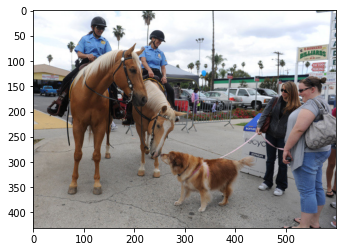

In [5]:
import pprint as pp

original_img = cv2.imread("./sample_img/sample_multiple_objects.jpg")

original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

plt.imshow(original_img)
results = tfnet.return_predict(original_img)



In [6]:
pp.pprint(results)

[{'bottomright': {'x': 157, 'y': 208},
  'confidence': 0.67079693,
  'label': 'person',
  'topleft': {'x': 61, 'y': 3}},
 {'bottomright': {'x': 286, 'y': 258},
  'confidence': 0.32715744,
  'label': 'person',
  'topleft': {'x': 200, 'y': 38}},
 {'bottomright': {'x': 329, 'y': 187},
  'confidence': 0.2517692,
  'label': 'person',
  'topleft': {'x': 317, 'y': 156}},
 {'bottomright': {'x': 371, 'y': 204},
  'confidence': 0.14781988,
  'label': 'person',
  'topleft': {'x': 354, 'y': 183}},
 {'bottomright': {'x': 524, 'y': 373},
  'confidence': 0.7331757,
  'label': 'person',
  'topleft': {'x': 443, 'y': 139}},
 {'bottomright': {'x': 592, 'y': 378},
  'confidence': 0.22580777,
  'label': 'person',
  'topleft': {'x': 561, 'y': 147}},
 {'bottomright': {'x': 594, 'y': 430},
  'confidence': 0.7661935,
  'label': 'person',
  'topleft': {'x': 501, 'y': 135}},
 {'bottomright': {'x': 596, 'y': 430},
  'confidence': 0.14075229,
  'label': 'person',
  'topleft': {'x': 567, 'y': 363}},
 {'bottomright'

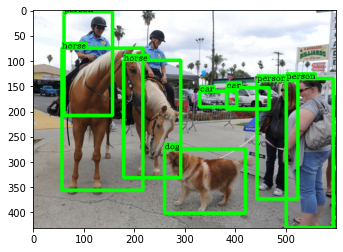

In [7]:
plt.imshow(boxing(original_img,results))

In [8]:
def get_output(frame):
    frame = np.asarray(frame)
    results = tfnet.return_predict(frame)
    new_frame = boxing(frame, results)
    return new_frame

In [ ]:

from moviepy.editor import *
my_clip = VideoFileClip("./sample_video/test_video.mp4")

modifiedClip = my_clip.fl_image( get_output )

modifiedClip.write_videofile("./sample_video/output.webm")
from IPython.display import Video
Video("./sample_video/output.webm")



Moviepy - Building video ./sample_video/output.webm.
MoviePy - Writing audio in outputTEMP_MPY_wvf_snd.ogg
MoviePy - Done.
Moviepy - Writing video ./sample_video/output.webm



t:  32%|███▏      | 12/38 [00:28<01:07,  2.58s/it, now=None]